In [1]:
import rasterio
from rasterio.windows import Window
import matplotlib.pyplot as plt

class PopulationRaster(object):

    def __init__(self, raster_file):
        self.raster_file = raster_file
        self.raster = rasterio.open(raster_file)
        self.lon_inc = \
            abs(self.raster.bounds.left - self.raster.bounds.right) / self.raster.width
        self.lat_inc = \
            abs(self.raster.bounds.top - self.raster.bounds.bottom) / self.raster.height
        
    def read_raster(self, bbox):
        min_lon, min_lat = bbox[0], bbox[1]
        max_lon, max_lat = bbox[2], bbox[3]
        window = self.raster_window_from_bbox(
            min_lon, min_lat, max_lon, max_lat
        )
        with rasterio.open(self.raster_file) as src:
            w = src.read(1, window=window)
        return w, window

    def get_lat_lon_offset(self, lon, lat):
        # grid offset to satisfy min_lon
        lon_off = \
            int((lon - self.raster.bounds.left) / self.lon_inc) 
        
        # grid offset to satisfy max_lat
        lat_off = \
            int((self.raster.bounds.top - lat) / self.lat_inc)  
        return lon_off, lat_off
    
    def raster_window_from_bbox(self, min_lon, min_lat, max_lon, max_lat):
        # compute the offset indices of the top left corner of our bbox
        lon_off, lat_off = self.get_lat_lon_offset(min_lon, max_lat)
        
        # compute the offset indices of the bottom right of our bbox
        lon_off_max, lat_off_max = self.get_lat_lon_offset(max_lon, min_lat)
        
        # compute the window size (width, height)
        lon_window = lon_off_max - lon_off
        lat_window = lat_off_max - lat_off

        return Window(lon_off, lat_off, lon_window, lat_window)

    @staticmethod
    def plot_raster(arr, title=None):
        """ helper function to plot a raster array """
        fig, ax = plt.subplots(figsize=(30, 10))
        plt.imshow(arr)
        plt.colorbar()
        plt.title(f'{title}')
        plt.xlabel('Column #')
        plt.ylabel('Row #')
        return fig, ax

In [2]:
raster_path = 'gbr_ppp_2020.tif'
pr = PopulationRaster(raster_path)
pr.raster.shape, pr.raster.bounds

((13196, 12496),
 BoundingBox(left=-8.650416617, bottom=49.864583335, right=1.7629166749999996, top=60.861249958))

In [3]:
bbox = (-0.7132, 51.2334, 0.4696, 51.7487)

((<Figure size 2160x720 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7feba912d860>),
 Window(col_off=9524, row_off=10935, width=1420, height=618))

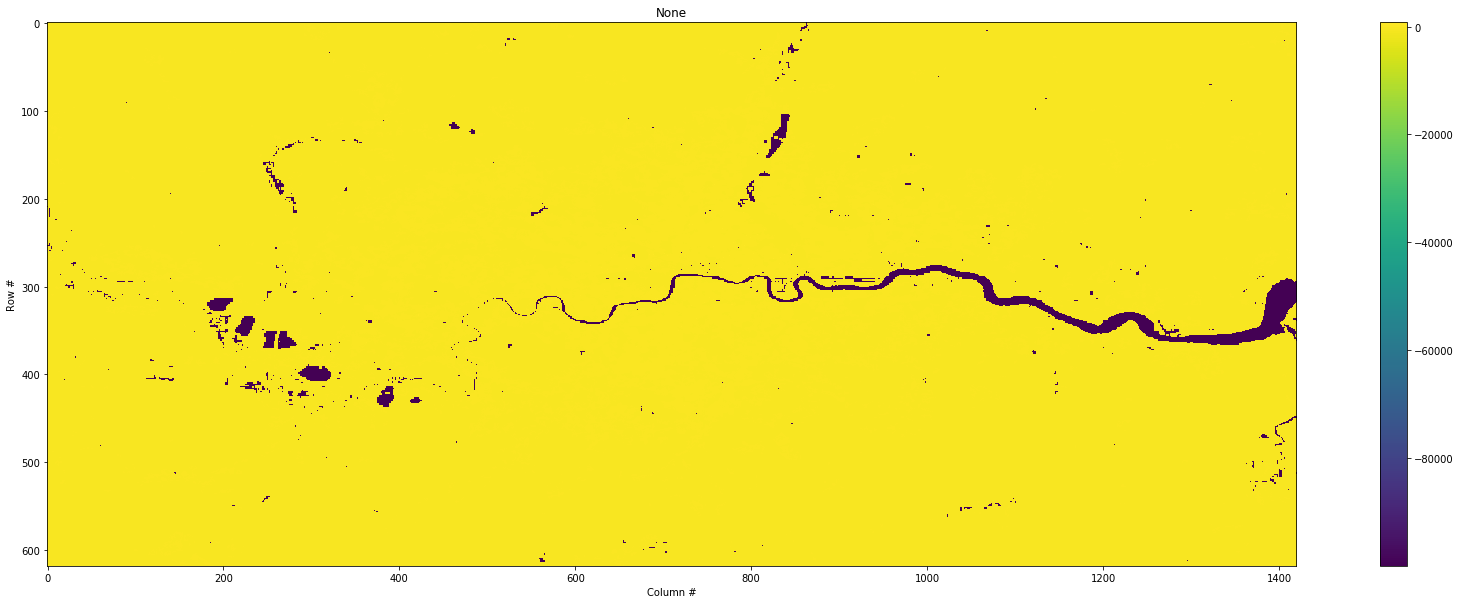

In [4]:
bbox_raster, w = pr.read_raster(bbox)
pr.plot_raster(bbox_raster), w